In [109]:
from torch import miopen_depthwise_convolution, nn
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.datasets import make_circles

In [110]:
# Getting a certain number of samples

number_of_samples = 25000

# Creating the circles
# X -> features, y -> labels
X, y = make_circles(number_of_samples, noise=0.04, random_state=42)

print(f"The length of X is {len(X)}")
print(f"The length of y is {len(y)}")
print(f"The first 5 values of X are {X[:5]}")
print(f"The first 5 values of y are {y[:5]}")

The length of X is 25000
The length of y is 25000
The first 5 values of X are [[-0.91364505 -0.3203678 ]
 [ 0.7771579  -0.3366601 ]
 [ 0.1655598  -1.09052905]
 [ 0.69016381  0.38434475]
 [ 0.59232631  0.60399161]]
The first 5 values of y are [0 1 0 1 1]


In [111]:
# Creating a dataframe of the data we have

circle_df = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})

circle_df.head()

,X1,X2,label
0,-0.913645,-0.320368,0
1,0.777158,-0.336660,1
2,0.165560,-1.090529,0
3,0.690164,0.384345,1
4,0.592326,0.603992,1


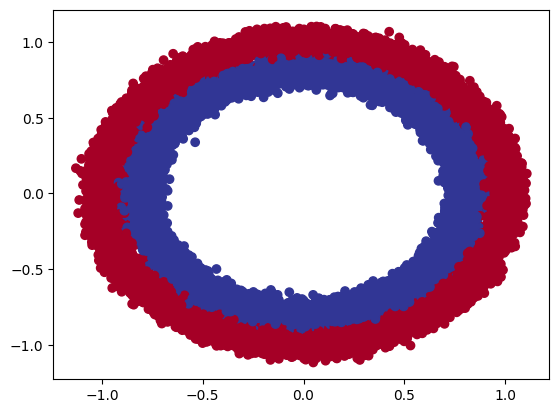

In [112]:
# Visualising the data from the frame

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

From the plot we can clearly see that we want to predict whether a point iwll be a blue point or a red point
To use pytorch,we must convert our data to tensors

In [113]:
# Checking input and output shapes
X.shape, y.shape

((25000, 2), (25000,))

In [114]:
# gettting the shape of one sample of each
X[0].shape, y[0].shape

((2,), ())

In [115]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
print(f"The first 5 values of X are {X[:5]}")
print(f"The first 5 values of y are {y[:5]}")

The first 5 values of X are tensor([[-0.9136, -0.3204],
        [ 0.7772, -0.3367],
        [ 0.1656, -1.0905],
        [ 0.6902,  0.3843],
        [ 0.5923,  0.6040]])
The first 5 values of y are tensor([0., 1., 0., 1., 1.])


Our data has been converted to tensors, moving on to split the training and the testing data

In [116]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print(f"Length of X train : {len(X_train)}")
print(f"Length of X test : {len(X_test)}")
print(f"Length of y train : {len(y_train)}")
print(f"Length of y test : {len(y_test)}")

Length of X train : 18750
Length of X test : 6250
Length of y train : 18750
Length of y test : 6250


The data has been split, we can now build the model. We also need to connect it ot a gpu if there is one available

In [117]:
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"This code will be running on the {device}")

This code will be running on the cuda


We have now setup our device as well, creating the neural network

In [118]:
class CircleModel1(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=10) # Two features are taken in here and 5 are gievn as output
        self.layer_2 = nn.Linear(in_features=10,out_features=10) # those 10 features are then sent to the second layer
        self.layer_3 = nn.Linear(in_features=10,out_features=1) # those 10 features are then sent to the second layer
        self.relu = nn.ReLU()
        
    def forward(self,x):
        return self.layer_3(self.layer_2(self.relu(self.layer_1(x))))

model_1 = CircleModel1().to(device)
model_1

CircleModel1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [119]:
# Confirming once again which device the model runs on 
print(f"The target device is {device}")

The target device is cuda


Since the model we are creating is quite simple, we can create it in another way, which is shown below

In [120]:
model_1 = CircleModel1().to(device)

model_1

CircleModel1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

As we can see nn.Sequential does the exact same thing, it created the boilerplate code for us

In [121]:
print(model_1.state_dict())

OrderedDict([('layer_1.weight', tensor([[-0.3041, -0.0775],
        [-0.5293,  0.6441],
        [-0.5190,  0.3779],
        [ 0.2485,  0.2298],
        [-0.3823,  0.6427],
        [ 0.1554,  0.0910],
        [-0.6231,  0.2968],
        [-0.1061, -0.3239],
        [ 0.6074,  0.1576],
        [-0.3912, -0.3579]], device='cuda:0')), ('layer_1.bias', tensor([-0.0338,  0.3948, -0.1807, -0.4035, -0.2421, -0.5283,  0.2522,  0.5473,
        -0.6657,  0.1642], device='cuda:0')), ('layer_2.weight', tensor([[ 0.1634,  0.0573, -0.1126,  0.1651,  0.1662,  0.1182, -0.0556, -0.0837,
          0.0338, -0.0559],
        [-0.0942,  0.2021,  0.2718, -0.0313, -0.0708,  0.0046, -0.0189,  0.0760,
          0.0886, -0.2872],
        [-0.1167,  0.2663,  0.1232, -0.0157, -0.1907, -0.1935, -0.2833, -0.1031,
          0.1068,  0.2016],
        [ 0.1460, -0.2795, -0.1902, -0.0499,  0.3059,  0.0457, -0.0819,  0.1308,
         -0.1204, -0.2047],
        [ 0.2308, -0.1438, -0.0634, -0.3146,  0.2116,  0.2396,  0.1152

Making some predictions using the model that we have created

In [122]:
# This is to get rid of the gradient tracking
with torch.inference_mode():
    untrained_predictions = model_1(X_test.to(device))
print(f"Length of predictions: {len(untrained_predictions)}, Shape: {untrained_predictions.shape}")
print(f"Lenght of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"The first 15 predictions are {untrained_predictions[:15]}")
print(f"The first 15 labels are {y_test[:15]}")

Length of predictions: 6250, Shape: torch.Size([6250, 1])
Lenght of test samples: 6250, Shape: torch.Size([6250, 2])
The first 15 predictions are tensor([[ 0.0479],
        [-0.0521],
        [ 0.0351],
        [ 0.0517],
        [-0.0732],
        [-0.0124],
        [ 0.1146],
        [-0.0133],
        [ 0.1193],
        [-0.0277],
        [ 0.1235],
        [ 0.1100],
        [ 0.0042],
        [ 0.1373],
        [ 0.1461]], device='cuda:0')
The first 15 labels are tensor([0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.])


Setting up the optimiser and the loss function

In [123]:
loss_function = nn.BCEWithLogitsLoss()
optimiser = torch.optim.SGD(params = model_1.parameters(), lr=0.1)

Calculating the accuracy of our model

In [124]:
def accuracy_function(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    accuracy = (correct / len(y_pred)) * 100
    return accuracy

Training the model

In [125]:
with torch.inference_mode():
    y_logits = model_1(X_test.to(device))[:5]
y_logits

tensor([[ 0.0479],
        [-0.0521],
        [ 0.0351],
        [ 0.0517],
        [-0.0732]], device='cuda:0')

We need to transform our data to be compatible, using sigmoids for the said task

In [126]:
y_pred_probs = torch.sigmoid(y_logits)
print(y_pred_probs)
print(torch.round(y_pred_probs))

tensor([[0.5120],
        [0.4870],
        [0.5088],
        [0.5129],
        [0.4817]], device='cuda:0')
tensor([[1.],
        [0.],
        [1.],
        [1.],
        [0.]], device='cuda:0')


The data we need is in the same format now

In [127]:
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_1(X_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

tensor([True, True, True, True, True], device='cuda:0')


Building the training and the testing loop  

In [128]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 5000
X_train,y_train = X_train.to(device), y_train.to(device)
X_test,y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # Training data
    model_1.train()
    
    # forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    #calculate loss and accuracy
    loss = loss_function(y_logits,y_train)
    
    acc = accuracy_function(y_true=y_train,y_pred=y_pred)
    
    #optimiser zero gradient
    optimiser.zero_grad()
    
    # loss backward (backpropogration)
    loss.backward()
    
    # optimiser step 
    optimiser.step()
    
    # Testing
    model_1.eval()
    
    with torch.inference_mode():
        # forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # calculate loss function 
        test_loss = loss_function(test_logits,y_test)
        
        test_acc = accuracy_function(y_true=y_test,y_pred=test_pred)
        
        if epoch % 1000 == 0:
            print(f"Epoch : {epoch}, Loss : {loss:.5f}, Accurancy: {acc:.2f}, Test Loss : {test_loss:.5f}, Test acc : {test_acc:.2f} ")
 

Epoch : 0, Loss : 0.69283, Accurancy: 52.35, Test Loss : 0.69256, Test acc : 52.50 
Epoch : 1000, Loss : 0.55477, Accurancy: 87.41, Test Loss : 0.55342, Test acc : 87.89 
Epoch : 2000, Loss : 0.08960, Accurancy: 98.79, Test Loss : 0.08997, Test acc : 98.69 
Epoch : 3000, Loss : 0.03575, Accurancy: 99.08, Test Loss : 0.03691, Test acc : 98.96 
Epoch : 4000, Loss : 0.02919, Accurancy: 99.08, Test Loss : 0.03044, Test acc : 99.09 


In [129]:
import requests
from pathlib import Path 

# Downloading a few helper functions if not already downloaded

if Path("helper_functions.py").is_file():
    print("File already exists, skipping download")
else:
    print("Downloading file please wait")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
        
from helper_functions import plot_predictions,plot_decision_boundary

File already exists, skipping download


Evaluating the model

In [135]:
# We ned the tensors to be on the same device, in my case the cuda device
model_1.eval().to(device)
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_1(X_test))).squeeze()
    
print(y_preds[:10],y_test[:10])

tensor([0., 1., 0., 1., 0., 0., 1., 1., 1., 1.], device='cuda:0') tensor([0., 1., 0., 1., 0., 0., 1., 1., 1., 1.], device='cuda:0')


Plotting the decision boundaries

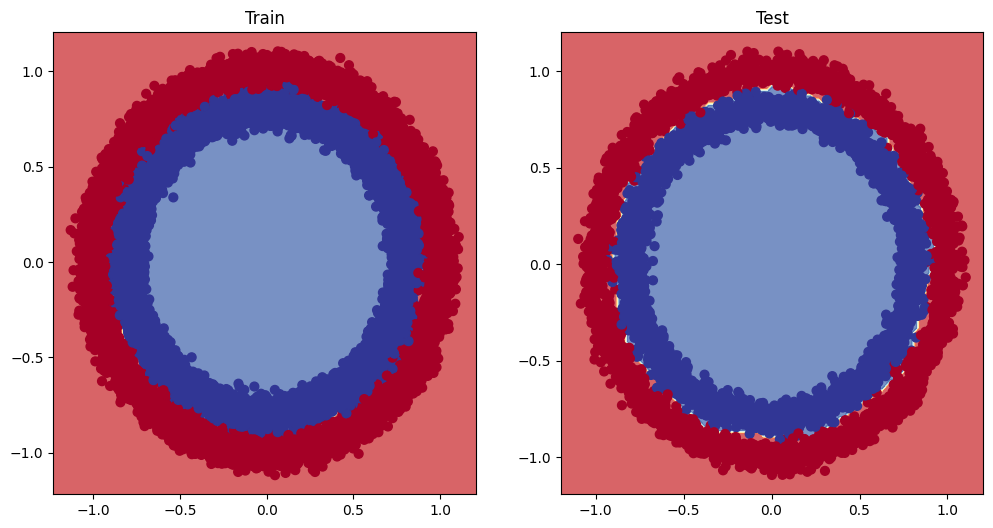

In [136]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

Using pickle to save the data now   

In [ ]:
import pickle
pickle.dump(model_1, open('../model/model.pkl', 'wb'))